# Tugas Modul 6

Nama : Zulfikar Irham

NIM : 21/475393/PA/20574

1. Modifikasi program tersebut untuk berbagai kemungkinan masukan dan kemudian
anda coba untuk menganalisis hasil yang diperoleh.
2. Dalam fisika dasar ditunjukkan bahwa jika jarak antara dua keping kapasitor adalah *a* dan di ruang antara dua keping kapasitor tersebut tidak ada sumber
muatan (ruang hampa) maka medan listriknya adalah konstan sebesar ***E***
sedang potensialnya adalah $V = Ex$. Coba anda tunjukkan bahwa hasil analitik
ini juga dapat diperoleh dari komputasi di atas.

# Jawab No.1

##6.3 Contoh masalah fisika : potensial listrik

Hukum Gauss dalam bentuk diferensial untuk medan listrik **E** dinyatakan sebagai

\begin{equation}
  \nabla \cdotp \mathbf{E} = \frac{\rho}{\epsilon_{0}},
  \tag{6.9}
\end{equation}

dengan $\epsilon_{0}$ adalah permitivitas ruang hampa. Adapun rapat muatan $\rho$ dikaitkan dengan muatan $q$ dan unsur volume $dV$ melalui kaitan

\begin{equation}
  q=\int_{V} \rho dV
  \tag{6.10}
\end{equation}

Mengingat medan listrik dikaitkan dengan potensial listrik $\phi$ oleh ungkapan $E = -\nabla \phi$ maka persamaan (6.9) dapat dinyatakan juga sebagai $\nabla \cdot \nabla \phi=-\rho/\epsilon_{0}$ yang dalam satu dimensi berbentuk

\begin{equation}
  \frac{d^{2}\phi}{dx^{2}}=-\frac{\rho}{\epsilon_{0}}
  \tag{6.11}
\end{equation}

Dapat dilihat bahwa persamaan (6.11) berbentuk sama dengan persamaan (6.1) sehingga metode penyelesaian yang dijelaskan di depan dapat digunakan untuk mencari potensial listrik pada syarat batas yang diberikan.
Tinjau suatu daerah antara $0 \le x \le 3$ yang memiliki rapat muatan berbentuk
$\rho(x) = 3\epsilon{0}x$ dan adanya syarat batas nilai potensial $\phi(0) = 0$ dan $\phi(3) = 0$. Masalah ini dapat dirumuskan seperti persamaan (6.1) dengan mengambil $y(x) = \phi(x)$ dan $f(x) = -\rho(x)/\epsilon_{0} = -3\epsilon_{0}x/\epsilon_{0} = -3x$.

Di bawah ini adalah contoh program untuk menyelesaikan masalah di atas yang ditulis dengan menggunakan bahasa pemrograman Python.


## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Mendefinisikan fungsi f(x) = -3x
def fi(x):
    return -3*x

In [3]:
#Membuat fungsi untuk mereturn data frame agar dapat mudah dipanggil
def metode_beda_hingga(fi,n,x0,xn,y0,yn):
    h = (xn-x0)/n
    
    x = list()
    y = list()
    a = list()
    b = list()
    c = list()
    r = list()
    rho = list()
    beta = list()
    
    for i in range(0,(n+1)):
        xi=x0+i*h
        yi=1
        bi=-2
        beta1=0
        rho1=0
        if (i==1):
            ri=fi(xi)*h*h-y0
        elif  (i==(n-1)):
            ri=fi(xi)*h*h-yn
        else :
            ri=fi(xi)*h*h
        x.append(xi)
        y.append(yi)
        b.append(bi)
        r.append(ri)
        beta.append(beta1)
        rho.append(rho1)
        
    for i in range(1,(n+1)):
        ci=1
        c.append(ci)

    for i in range (1,(n+1)):
        ai=1
        a.append(ai)

#-------------------------------------------------------------------------------
#--- Mengubah matriks tridiagonal ke bentuk matriks atas yang
#--- hanya mengandung dua larik yaitu beta(i) dan c(i) serta r(i) ke rho(i)
#-------------------------------------------------------------------------------
    beta[1]=b[1]
    rho[1]=r[1]
    for k in range(2,(n)):
        beta[k]=b[k]-(a[k]/beta[k-1])*c[k-1]
        rho[k]=r[k]-(a[k]/beta[k-1])*rho[k-1]
#-------------------------------------------------------------------------------
#----Menghitung y(i) dengan substitusi balik yaitu dihitung
#----lebih dahulu y(n-1) dan dilanjutkan ke y(n-2) dan seterusnya sampai y(1)
#-------------------------------------------------------------------------------
    y[0]=y0
    y[n]=yn
    y[n-1]=rho[n-1]/beta[n-1]
    for j in range(2,n):
        y[n-j]=(rho[n-j]-c[n-j]*y[n-j+1])/beta[n-j]
#-------------------------------------------------------------------------------
#----Menampilkan hasil dalam bentuk kolom 
#-------------------------------------------------------------------------------
    df = pd.DataFrame({
        "xi" : x,
        "yi" : y,
        "ri" : r,
        "beta_i" : beta,
        "rho_i" : rho
    })
    return df


In [4]:
#Dataframe dengan nilai tetap
df = metode_beda_hingga(fi,n=30,x0=0,xn=3,y0=10,yn=0)
df

,xi,yi,ri,beta_i,rho_i
0,0.0,10.000000,-0.000,0.000000,0.000000
1,0.1,10.116167,-10.003,-2.000000,-10.003000
2,0.2,10.229333,-0.006,-1.500000,-5.007500
3,0.3,10.336500,-0.009,-1.333333,-3.347333
4,0.4,10.434667,-0.012,-1.250000,-2.522500
5,0.5,10.520833,-0.015,-1.200000,-2.033000
6,0.6,10.592000,-0.018,-1.166667,-1.712167
7,0.7,10.645167,-0.021,-1.142857,-1.488571
8,0.8,10.677333,-0.024,-1.125000,-1.326500
9,0.9,10.685500,-0.027,-1.111111,-1.206111


In [5]:
#Membuat fungsi agar dapat membandingkan grafik yang parameternya belum diubah dengan yang diubah
def plot_grafik(df1, df2, title):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    axs[0].plot(df1["xi"],df1["yi"],'+')
    axs[0].set_title("Grafik dengan parameter yang tanpa diubah")
    axs[0].set_xlabel("posisi x",fontsize=20)
    axs[0].set_ylabel(" potensial $\phi (x)$",fontsize=20)
    axs[0].legend(["$\phi(x)$"],loc='best')
    axs[0].axhline(y=0, color='k')
    #plt.axvline(x=0, color='k')
    
    axs[1].plot(df2["xi"],df2["yi"],'+')
    axs[1].set_xlabel("posisi x",fontsize=20)
    axs[1].set_ylabel(" potensial $\phi (x)$",fontsize=20)
    axs[1].set_title(title)
    axs[1].legend(["$\phi(x)$"],loc='best')
    axs[1].axhline(y=0, color='k')
    plt.show()

Mengubah nilai n menjadi 100

In [6]:
df_n100 = metode_beda_hingga(fi,n = 100,x0=0,xn=3,y0=10,yn=0)
df_n100

,xi,yi,ri,beta_i,rho_i
0,0.00,10.000000,-0.000000,0.000000,0.000000
1,0.03,10.034986,-10.000081,-2.000000,-10.000081
2,0.06,10.069892,-0.000162,-1.500000,-5.000203
3,0.09,10.104635,-0.000243,-1.333333,-3.333711
4,0.12,10.139136,-0.000324,-1.250000,-2.500607
...,...,...,...,...,...
96,2.88,1.416064,-0.007776,-1.010417,-0.356900
97,2.91,1.073914,-0.007857,-1.010309,-0.361078
98,2.94,0.723908,-0.007938,-1.010204,-0.365331
99,2.97,0.365963,-0.008019,-1.010101,-0.369660


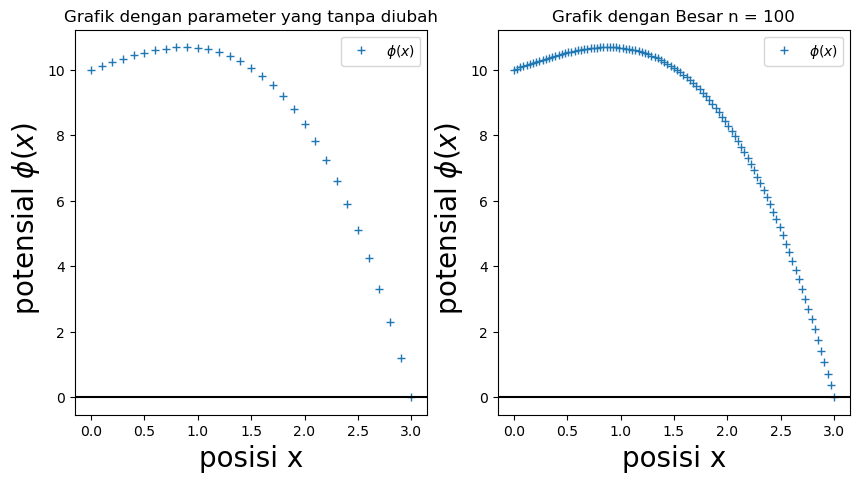

In [7]:
title = "Grafik dengan Besar n = 100"
plot_grafik(df,df_n100, title)

Jikan n diubah menjadi semakin besar maka titik-titik pada grafik akan bertambah banyak

Mengubah x0 menjadi 2

In [8]:
df_x02 = metode_beda_hingga(fi, n = 30,x0=2,xn=3,y0=10,yn=0)
df_x02

,xi,yi,ri,beta_i,rho_i
0,2.000000,10.000000,-0.006667,0.000000,0.000000
1,2.033333,9.779981,-10.006778,-2.000000,-10.006778
2,2.066667,9.553185,-0.006889,-1.500000,-5.010278
3,2.100000,9.319500,-0.007000,-1.333333,-3.347185
4,2.133333,9.078815,-0.007111,-1.250000,-2.517500
5,2.166667,8.831019,-0.007222,-1.200000,-2.021222
6,2.200000,8.576000,-0.007333,-1.166667,-1.691685
7,2.233333,8.313648,-0.007444,-1.142857,-1.457460
8,2.266667,8.043852,-0.007556,-1.125000,-1.282833
9,2.300000,7.766500,-0.007667,-1.111111,-1.147963


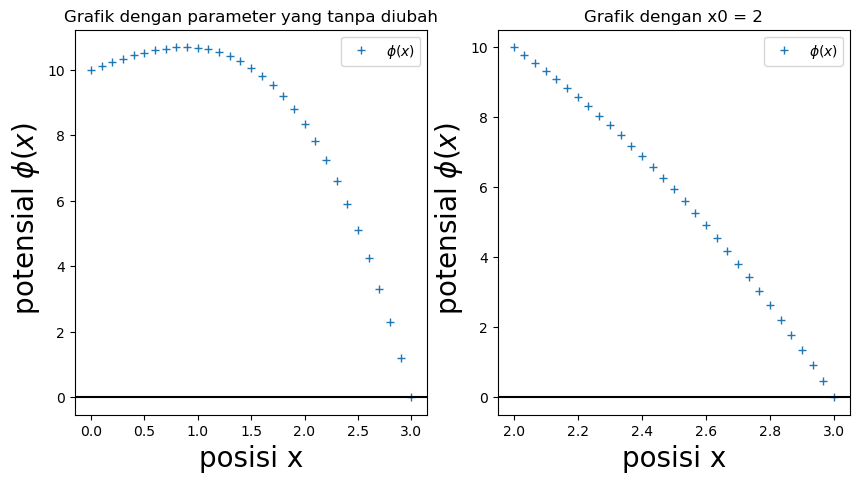

In [9]:
title = "Grafik dengan x0 = 2"
plot_grafik(df,df_x02, title)

Mengubah besar x0 menjadi 2 dapat membuat kurva pada grafik dimulai di titik x = 2 sehingga grafik terlihat seperti semakin linear

Mengubah xn menjadi 5

In [10]:
df_xn5 = metode_beda_hingga(fi,n = 30,x0=0,xn=5,y0=10,yn=0)
df_xn5

,xi,yi,ri,beta_i,rho_i
0,0.000000,10.000000,-0.000000,0.000000,0.000000
1,0.166667,11.747685,-10.013889,-2.000000,-10.013889
2,0.333333,13.481481,-0.027778,-1.500000,-5.034722
3,0.500000,15.187500,-0.041667,-1.333333,-3.398148
4,0.666667,16.851852,-0.055556,-1.250000,-2.604167
5,0.833333,18.460648,-0.069444,-1.200000,-2.152778
6,1.000000,20.000000,-0.083333,-1.166667,-1.877315
7,1.166667,21.456019,-0.097222,-1.142857,-1.706349
8,1.333333,22.814815,-0.111111,-1.125000,-1.604167
9,1.500000,24.062500,-0.125000,-1.111111,-1.550926


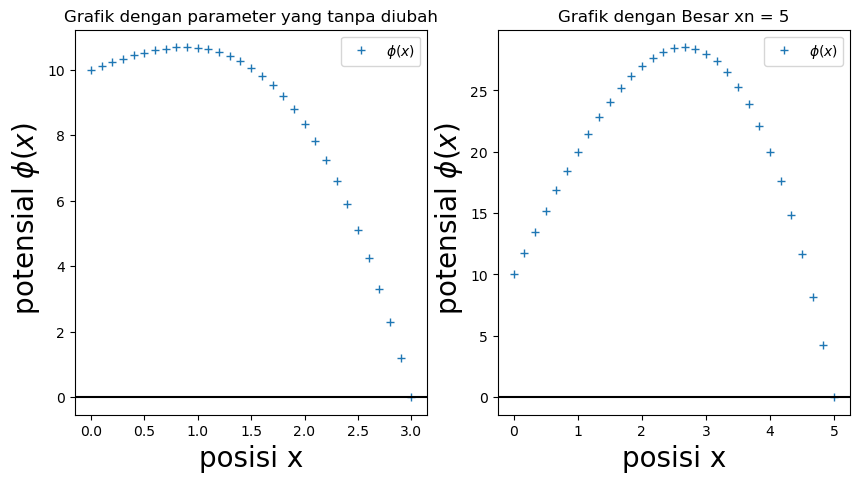

In [11]:
title = "Grafik dengan Besar xn = 5"
plot_grafik(df,df_xn5, title)

Jika diubah besar xn menjadi 5 maka kurva akan mengakhiri titiknya di x = 5 sehingga membuat kurvanya menjadi seperti bukit

Mengubah besar y0 menjadi 4

In [12]:
df_y04 = metode_beda_hingga(fi,n = 30,x0=0,xn=3,y0=4,yn=0)
df_y04

,xi,yi,ri,beta_i,rho_i
0,0.0,4.000000,-0.000,0.000000,0.000000
1,0.1,4.316167,-4.003,-2.000000,-4.003000
2,0.2,4.629333,-0.006,-1.500000,-2.007500
3,0.3,4.936500,-0.009,-1.333333,-1.347333
4,0.4,5.234667,-0.012,-1.250000,-1.022500
5,0.5,5.520833,-0.015,-1.200000,-0.833000
6,0.6,5.792000,-0.018,-1.166667,-0.712167
7,0.7,6.045167,-0.021,-1.142857,-0.631429
8,0.8,6.277333,-0.024,-1.125000,-0.576500
9,0.9,6.485500,-0.027,-1.111111,-0.539444


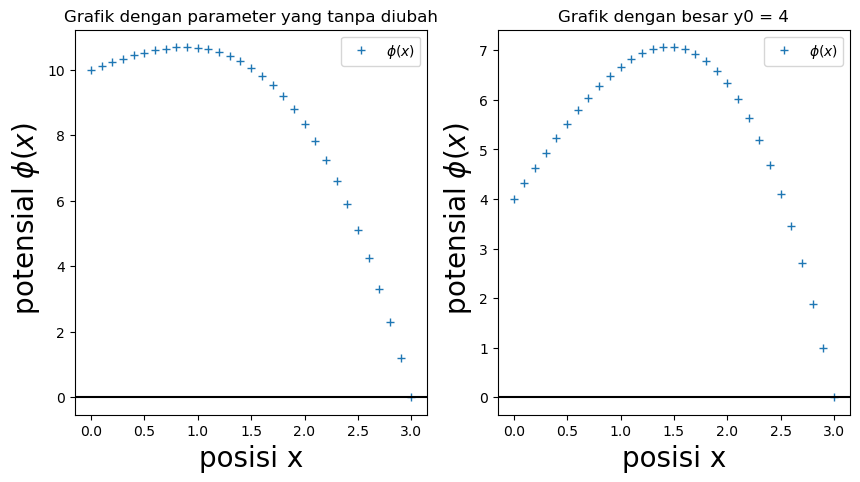

In [13]:
title = "Grafik dengan besar y0 = 4"
plot_grafik(df,df_y04, title)

Jika diubah besar y0 menjadi 4 maka kurva akan mengawali titiknya di y = 4 sehingga membuat kurvanya menjadi seperti bukit

Mengubah besar yn menjadi 15

In [14]:
df_yn15 = metode_beda_hingga(fi,n = 30,x0=0,xn=3,y0=10,yn=15)
df_yn15

,xi,yi,ri,beta_i,rho_i
0,0.0,10.000000,-0.000,0.000000,0.000000
1,0.1,10.616167,-10.003,-2.000000,-10.003000
2,0.2,11.229333,-0.006,-1.500000,-5.007500
3,0.3,11.836500,-0.009,-1.333333,-3.347333
4,0.4,12.434667,-0.012,-1.250000,-2.522500
5,0.5,13.020833,-0.015,-1.200000,-2.033000
6,0.6,13.592000,-0.018,-1.166667,-1.712167
7,0.7,14.145167,-0.021,-1.142857,-1.488571
8,0.8,14.677333,-0.024,-1.125000,-1.326500
9,0.9,15.185500,-0.027,-1.111111,-1.206111


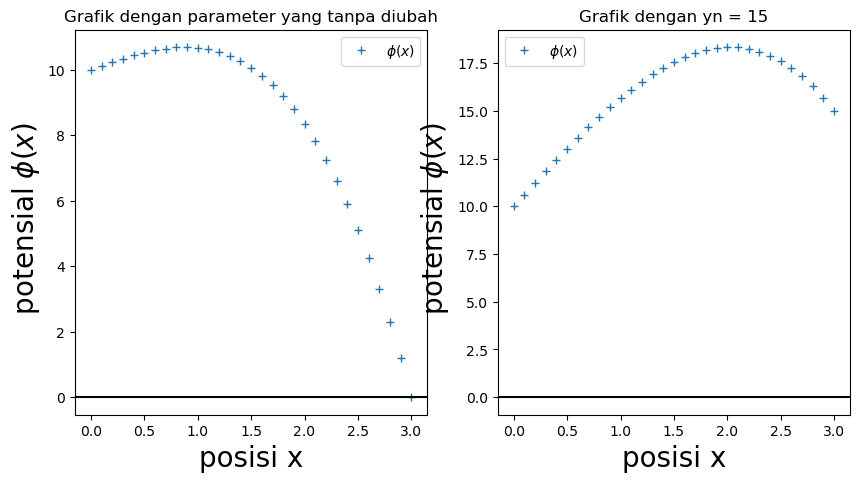

In [15]:
title = "Grafik dengan yn = 15"
plot_grafik(df, df_yn15, title)

Ketika yn diubah menjadi 15 kurva diakhiri dititik y = 15 dan juga membuat puncak kurva nilainya naik menjadi sekitar 17.5

# Jawab No.2

Persamaannya dapat dinyatakan sebagai berikut

$\nabla \cdot \vec E = 0$

$\vec E = -\nabla V$

$\nabla \cdot \vec E = -\nabla \cdot \nabla V$

$\nabla \cdot \vec E = -\nabla^{2}V$

$\nabla^{2}V = -\nabla \cdot \vec E$

$\frac{d^2V}{dx^2} = 0$

$f(x)=0$

In [16]:
def fx(x):
    fi = 0
    return fi

In [17]:
df_VEX = metode_beda_hingga(fx,n = 30,x0=0,xn=3,y0=0,yn=10)
df_VEX

,xi,yi,ri,beta_i,rho_i
0,0.0,0.000000,0.0,0.000000,0.0
1,0.1,0.333333,0.0,-2.000000,0.0
2,0.2,0.666667,0.0,-1.500000,0.0
3,0.3,1.000000,0.0,-1.333333,0.0
4,0.4,1.333333,0.0,-1.250000,0.0
5,0.5,1.666667,0.0,-1.200000,0.0
6,0.6,2.000000,0.0,-1.166667,0.0
7,0.7,2.333333,0.0,-1.142857,0.0
8,0.8,2.666667,0.0,-1.125000,0.0
9,0.9,3.000000,0.0,-1.111111,0.0


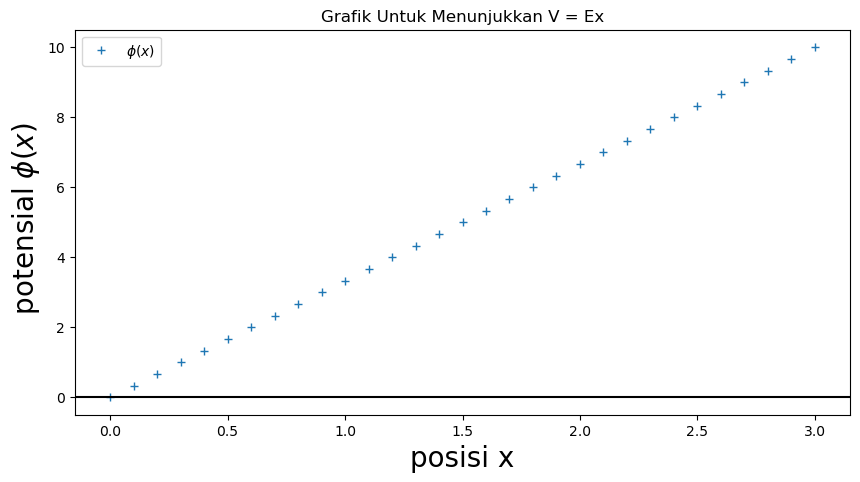

In [18]:
fig, axs = plt.subplots(figsize=(10,5))
axs.plot(df_VEX["xi"],df_VEX["yi"],'+')
axs.set_title("Grafik Untuk Menunjukkan V = Ex")
axs.set_xlabel("posisi x",fontsize=20)
axs.set_ylabel(" potensial $\phi (x)$",fontsize=20)
axs.legend(["$\phi(x)$"],loc='best')
axs.axhline(y=0, color='k');

Dapat dilihat pada grafik di atas bahwa menunjukkan garis yang linear artinya jika $V = Ex$ dan $E$ konstan maka hasil tersebut dapat dibuktikan dengan komputasi di atas. Berikut program untuk menunjukkan besar $E$ yang diperoleh

In [19]:
E = df_VEX["yi"]/df_VEX["xi"]
E

0          NaN
1     3.333333
2     3.333333
3     3.333333
4     3.333333
5     3.333333
6     3.333333
7     3.333333
8     3.333333
9     3.333333
10    3.333333
11    3.333333
12    3.333333
13    3.333333
14    3.333333
15    3.333333
16    3.333333
17    3.333333
18    3.333333
19    3.333333
20    3.333333
21    3.333333
22    3.333333
23    3.333333
24    3.333333
25    3.333333
26    3.333333
27    3.333333
28    3.333333
29    3.333333
30    3.333333
dtype: float64

$E$ konstan dengan besar $E = 3.33333$